<a href="https://colab.research.google.com/github/pri-nitta/FIAP_IA/blob/main/gatos_e_caes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificando cães e gatos.

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import cv2

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Conv2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os
caminho_da_pasta = "/content/drive/My Drive/cat_dog_images"
pasta_imagens = Path(caminho_da_pasta)

Mounted at /content/drive


In [5]:
# Listando todas as imagens do diretório
filepaths = list(pasta_imagens.glob(r'**/*.jpg'))
filepaths

[PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (8).jpg'),
 PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (802).jpg'),
 PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (800).jpg'),
 PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (803).jpg'),
 PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (792).jpg'),
 PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (796).jpg'),
 PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (81).jpg'),
 PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (791).jpg'),
 PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (793).jpg'),
 PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (794).jpg'),
 PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (801).jpg'),
 PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (799).jpg'),
 PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (795).jpg'),
 PosixPath('/content/drive/My Drive/cat_dog_images/dog/dog (80).jpg

In [6]:
# Inicializando rótulos e listas de imagens para armazenar os dados
labels = [] #armazenando as variáveis target
images = [] #armazenando imagens

# Definindo o tamanho da dimensão da imagem
image_size = 64

# Um loop for para definir as variáveis x e y para os modelos
for filepath in filepaths:
    # Divide o nome do caminho para extrair o cabeçalho do caminho com split
    head = os.path.split(filepath)
    # Divide o cabeçalho do caminho anterior para extrair o nome do animal
    animal = os.path.split(head[0])
    # Armazena o nome do animal na lista de labels
    labels.append(animal[1])
    # Obtem a imagem do caminho com cv2
    img = cv2.imread(str(filepath))
    # Redimensiona a imagem e normalize o intervalo de pixels para ficar entre 0 e 1 (padronização)
    # Utilizando float32 para criar uma precisão limitada (menor demanda de memória em comparação com tipos de ponto flutuante de maior precisão: float64)
    img = cv2.resize(img, (image_size, image_size)).astype('float32') / 255.0
    # Adiciona a imagem na lista de imagens
    images.append(img)

# Converte a imagem em lista de array
images = np.array(images)
# Converte as labels para lista de array
labels = np.array(labels)

In [7]:
images.shape

(530, 64, 64, 3)

In [8]:
#3 é o numero de matrizes, portanto são os rgb

images

array([[[[0.32156864, 0.53333336, 0.5294118 ],
         [0.3372549 , 0.54509807, 0.54509807],
         [0.3764706 , 0.5921569 , 0.5921569 ],
         ...,
         [0.23137255, 0.4627451 , 0.44313726],
         [0.20784314, 0.4509804 , 0.43137255],
         [0.24313726, 0.4745098 , 0.47843137]],

        [[0.39215687, 0.49019608, 0.48235294],
         [0.28235295, 0.5019608 , 0.47843137],
         [0.22352941, 0.42745098, 0.40784314],
         ...,
         [0.2627451 , 0.4745098 , 0.4627451 ],
         [0.28627452, 0.5137255 , 0.49803922],
         [0.20784314, 0.45490196, 0.43529412]],

        [[0.6117647 , 0.6431373 , 0.6431373 ],
         [0.4392157 , 0.5137255 , 0.5058824 ],
         [0.32941177, 0.5176471 , 0.49411765],
         ...,
         [0.29803923, 0.5058824 , 0.4509804 ],
         [0.21960784, 0.42745098, 0.37254903],
         [0.1764706 , 0.40392157, 0.33333334]],

        ...,

        [[0.41960785, 0.6117647 , 0.5647059 ],
         [0.4       , 0.6313726 , 0.5764706 ]

In [9]:
labels

array(['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog',

In [10]:
# Salvando a lista de caminhos de arquivo
pd_filepaths = pd.Series(filepaths, name='Filepath').astype(str)

# Visualizando o camiho das imagens
print(pd_filepaths[:3])


0    /content/drive/My Drive/cat_dog_images/dog/dog...
1    /content/drive/My Drive/cat_dog_images/dog/dog...
2    /content/drive/My Drive/cat_dog_images/dog/dog...
Name: Filepath, dtype: object


In [11]:
# Visualizando os rótulos das imagens
print(labels[:3])

# Adicionando a label
pd_labels = pd.Series(labels, name='Label')

['dog' 'dog' 'dog']


In [12]:
pd_labels

,Label
0,dog
1,dog
2,dog
3,dog
4,dog
...,...
525,cat
526,cat
527,cat
528,cat


In [13]:
# Concatenando the filepaths and labels
df = pd.concat([pd_filepaths, pd_labels], axis=1)


df.head()


,Filepath,Label
0,/content/drive/My Drive/cat_dog_images/dog/dog...,dog
1,/content/drive/My Drive/cat_dog_images/dog/dog...,dog
2,/content/drive/My Drive/cat_dog_images/dog/dog...,dog
3,/content/drive/My Drive/cat_dog_images/dog/dog...,dog
4,/content/drive/My Drive/cat_dog_images/dog/dog...,dog


In [14]:
df.tail()

,Filepath,Label
525,/content/drive/My Drive/cat_dog_images/cat/cat...,cat
526,/content/drive/My Drive/cat_dog_images/cat/cat...,cat
527,/content/drive/My Drive/cat_dog_images/cat/cat...,cat
528,/content/drive/My Drive/cat_dog_images/cat/cat...,cat
529,/content/drive/My Drive/cat_dog_images/cat/cat...,cat


In [15]:
# Embaralhando o dataframe
df = df.sample(frac=1).reset_index(drop = True)

df.head(10)

,Filepath,Label
0,/content/drive/My Drive/cat_dog_images/cat/cat...,cat
1,/content/drive/My Drive/cat_dog_images/cat/cat...,cat
2,/content/drive/My Drive/cat_dog_images/dog/dog...,dog
3,/content/drive/My Drive/cat_dog_images/cat/cat...,cat
4,/content/drive/My Drive/cat_dog_images/cat/cat...,cat
5,/content/drive/My Drive/cat_dog_images/cat/cat...,cat
6,/content/drive/My Drive/cat_dog_images/cat/cat...,cat
7,/content/drive/My Drive/cat_dog_images/dog/dog...,dog
8,/content/drive/My Drive/cat_dog_images/dog/dog...,dog
9,/content/drive/My Drive/cat_dog_images/cat/cat...,cat


In [16]:
# Cria uma cópia do dataframe com apenas uma imagem de cada animal
df_singles = df.copy().drop_duplicates(subset=('Label')).reset_index() # o subset está procurando por duplicatas apenas na coluna chamada 'Label' e removendo todas as duplicatas encontradas.


len(df_singles)

2

In [17]:
# Define o número de classes
num_classes = df_singles.shape[0]

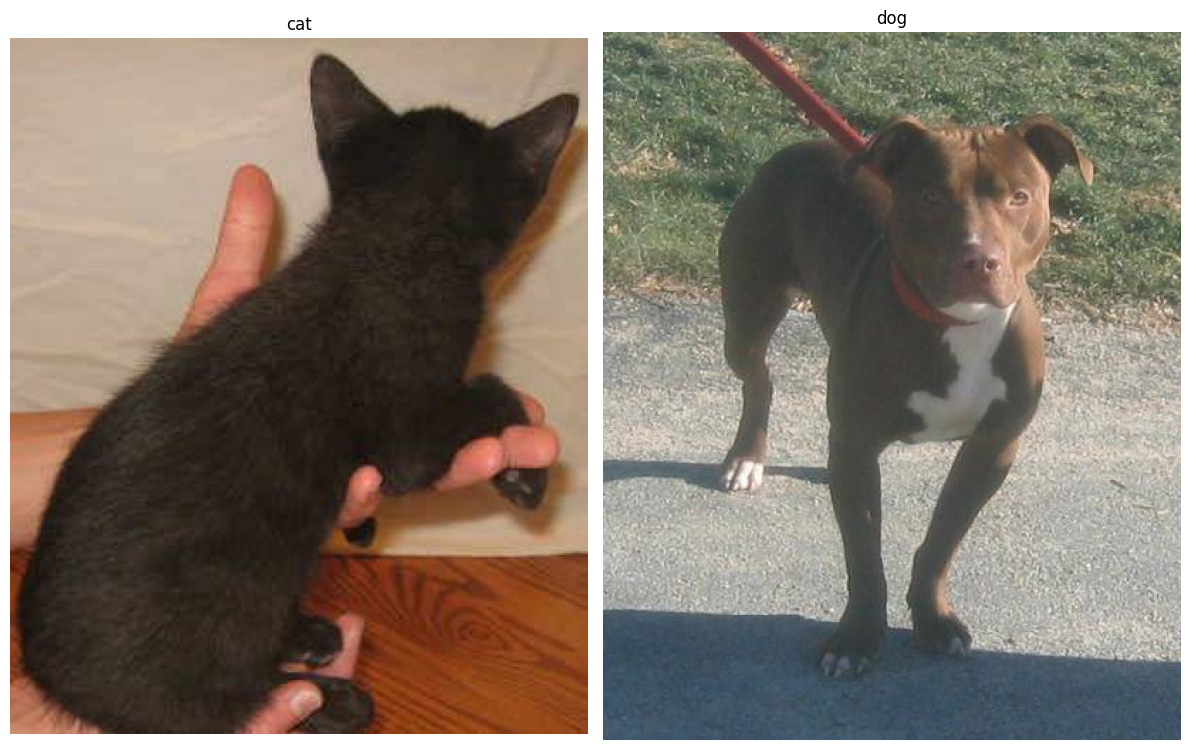

In [18]:
import matplotlib.pyplot as plt
# Configura o número de linhas e colunas para visualizar os dados no plot
ROW = 1
COLUMN = 2

# Dimensões das imagens
plt.figure(figsize=(12, 9))
#Loop para cada animal
for i in range(num_classes):
    # Defina uma variável de imagem local para i imagem no dataframe de singles
    image = df_singles.Filepath[i]
    # Define a posição da imagem a ser plotada
    plt.subplot(ROW, COLUMN, i+1)
    # Mostra a imagem
    plt.imshow(plt.imread(image))
    # Adiciona o rótulo do bichinho que corresponde à imagem
    plt.title('{}'.format(df_singles.Label[i]))
    # Desliga o eixo de plotagem
    plt.axis('off')
    # Faça com que o preenchimento ao redor das imagens seja mínimo
    plt.tight_layout()
plt.show()

Treinamento

In [19]:
x_train, x_test, y_train, y_test = train_test_split(images,
                                           labels, test_size=0.2, stratify=labels, random_state=44)
# Analisando a dimensão dos dados
x_train.shape

(424, 64, 64, 3)

In [20]:
x_test.shape

(106, 64, 64, 3)

In [23]:
# Achatar os dados de teste e treinamento
x_train_flat = x_train.reshape(x_train.shape[0], x_train.shape[1]* x_train.shape[2]* x_train.shape[3])
x_test_flat = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2] * x_test.shape[3])

In [22]:
x_train_flat.shape

(424, 12288)

In [24]:

# Converter Strings em Numéricos
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# Converte um vetor de classe (inteiros) em uma matriz de classe categórica.
y_train_tf = keras.utils.to_categorical(y_train, num_classes)
y_test_tf = keras.utils.to_categorical(y_test, num_classes)


In [27]:
from distutils.file_util import copy_file

# Defina um objeto ModelCheckpoint para usar os melhores pesos para este modelo
#minimiza tempo de processamento
checkpointer = ModelCheckpoint(filepath="weights.best.keras", verbose=0, save_best_only=True)
# save best model

In [28]:
# Define a forma de entrada das imagens passadas pelo modelo
input_shape = (image_size, image_size, 3)

# Defina a taxa de aprendizado e a queda de peso para o otimizador usar
learning_rate = 0.001

In [29]:
tf.random.set_seed(42) # Defindo uma semente aleatória para utilizar sempre os mesmos dados durante nossos testes

model = Sequential() # Abrindo a sequencia do modelo

# 1 camada convolucional com 128 neurônios | filtro utilizando uma matriz 3x3 sendo movimentado por um stride de 2
# padding ativado (com bordas de zeros) | função de ativação ReLU | regularização L2 ativada
#regularizers = penalização no kernel
model.add(Conv2D(128,
                 kernel_size=(3, 3),
                 strides=(2, 2),
                 padding='same',
                 activation='relu',
                 kernel_regularizer=keras.regularizers.l2(0.001),
                 input_shape=input_shape)),

# Camada de MaxPolling ativada, com uma matriz 2x2. Padding ativado
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))

# Regularização de dropout ativada
model.add(Dropout(0.2))

# 2 camada convolucional com 92 neurônios | filtro utilizando uma matriz 3x3 sendo movimentado por um stride de 2
# padding ativado (com bordas de zeros) | função de ativação ReLU | regularização L2 ativada

model.add(Conv2D(92,
                 kernel_size=(3, 3),
                 strides=(2, 2),
                 padding='same',
                 activation='relu',
                 kernel_regularizer=keras.regularizers.l2(0.001))),

# Camada de MaxPolling ativada, com uma matriz 2x2. Padding ativado
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))

# Regularização de dropout ativada
model.add(Dropout(0.2))

# Camada que achata dos dados da imagem
model.add(Flatten())
# Camada Dense da rede neural convolucional + função de ativação ReLU
model.add(Dense(256, activation='relu'))
# Camada de saída da rede, utilizando a função de ativação sigmoid para classificação binária
#softmax pode se comportar melhor com multiclasses

model.add(Dense(y_train_tf.shape[1], activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:

# Monitor para interromper o modelo antecipadamente quando a melhoria da perda de validação for mínima
#parar quando estagnar
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=10, verbose=1, mode='auto') #Aqui utilizando early stopping

# Compilando o modelo e aplicação a função de custo Adam (utilizando a learning rate que configuramos anteriormente)
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate), metrics=['accuracy'])

# Salve os dados do modelo em um arquivo h5
model.save('./cat_dog.h5')
# Resumo do modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 92)            │         106,076 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 92)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 92)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1472)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         377,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 487,262 (1.86 MB)

 Trainable params: 487,262 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:

# Treinando o modelo
history = model.fit(x_train,y_train_tf, validation_split=0.25, callbacks=[monitor,checkpointer],
                    verbose=1, epochs=45, batch_size=50, shuffle=True)

Epoch 1/45
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.6178 - loss: 0.7986 - val_accuracy: 0.3962 - val_loss: 0.7960
Epoch 2/45
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.4453 - loss: 0.7924 - val_accuracy: 0.6132 - val_loss: 0.7604
Epoch 3/45
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.6040 - loss: 0.7520 - val_accuracy: 0.6132 - val_loss: 0.7456
Epoch 4/45
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.6040 - loss: 0.7398 - val_accuracy: 0.6132 - val_loss: 0.7359
Epoch 5/45
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.6040 - loss: 0.7276 - val_accuracy: 0.6132 - val_loss: 0.7238
Epoch 6/45
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.6040 - loss: 0.7161 - val_accuracy: 0.6132 - val_loss: 0.7165
Epoch 7/45
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.6449 - loss: 0.7086 - val_accuracy: 0.6132 - val_loss: 0.7087
Epoch 8/45
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.6610 - loss: 0.6896 - val_accuracy: 0.6226 - val_loss:

Validação do modelo

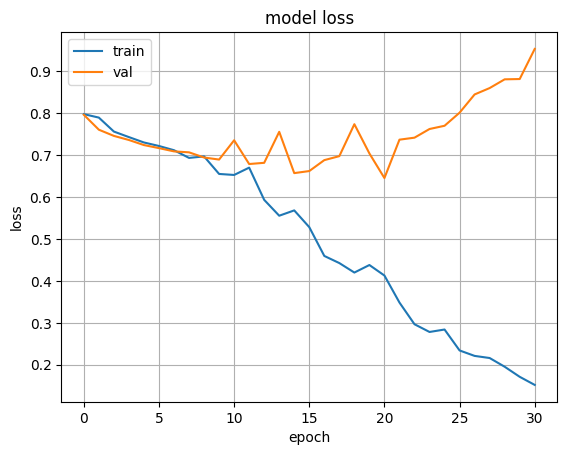

In [32]:

# Validação o erro por épocas
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True)
plt.show()


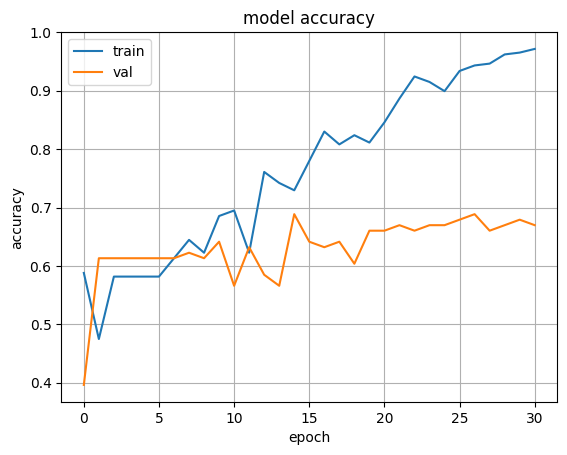

In [33]:

# Validação da acurácia por épocas
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True)
plt.show()

In [34]:

# Armazena as predicações do modelo dos dados de teste em uma variável
cnn_pred_cat_dog = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [35]:

# Define o índice do valor máximo do modelo de previsão para uma variável
# O valor máximo indica o caractere de previsão do modelo que a imagem representa
cnn_pred_cat_dog = np.argmax(cnn_pred_cat_dog,axis=1)

# Define uma variável para armazenar o rótulo que representa o resultado verdadeiro
y_true = np.argmax(y_test_tf,axis=1)

In [36]:
# Cria um array de nomes de caracteres igual ao array de labels
animal_names = labels
# Reduza os nomes dos animais para apenas valores dict únicos
animal_names = list(dict.fromkeys(animal_names))
# Ordena os caracteres em ordem alfabética, qual é a ordem em que os dados são alimentados
animal_names = sorted(animal_names)


In [37]:
# Criando a matriz de confusão
cnn_cm_cat_dog = metrics.confusion_matrix(y_true, cnn_pred_cat_dog)
# Definindo a acurácia
cnn_accuracy_cat_dog = metrics.accuracy_score(y_true, cnn_pred_cat_dog)

# Print do classification report
print(metrics.classification_report(y_true, cnn_pred_cat_dog, target_names=animal_names))
# Print da acurácia
print("Accuracy score: {}".format(cnn_accuracy_cat_dog))

              precision    recall  f1-score   support

         cat       0.76      0.68      0.72        62
         dog       0.61      0.70      0.65        44

    accuracy                           0.69       106
   macro avg       0.69      0.69      0.69       106
weighted avg       0.70      0.69      0.69       106

Accuracy score: 0.6886792452830188


In [38]:

#Função para adivinhar o animal
def guess_animal(filepath):
    # Converte o caminho do arquivo para uma imagem
    image = cv2.imread(filepath)
    # Redimensione a imagem e normalize o intervalo de pixels para ficar entre 0 e 1
    img = cv2.resize(image, (image_size, image_size)).astype('float32') / 255.0
    # Expandir a forma do array de imagens
    img = np.expand_dims(img, axis=0)
    # Usando o modelo para prever o animal que representa a imagem
    pred = model.predict(img)
    # Definindo uma variável para armazenar o índice que representa o caractere que representa a imagem
    classes=np.argmax(pred,axis=1)
    # Print no nome do animal previsto
    print(animal_names[classes[0]])
    # Plote a imagem do animal
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Desliga o eixo de plotagem
    plt.axis('off')

Teste do modelo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
cat


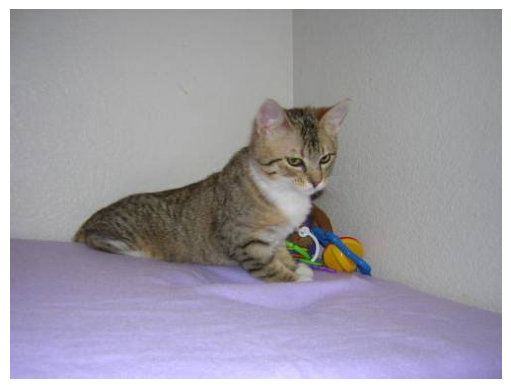

In [40]:
guess_animal('/content/drive/My Drive/Teste/cat.9970.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
cat


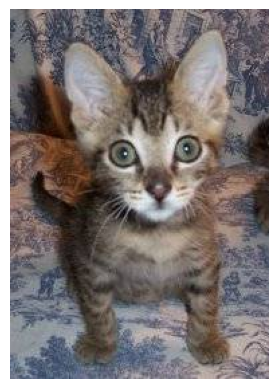

In [41]:
guess_animal('/content/drive/My Drive/Teste/cat.9909.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
cat


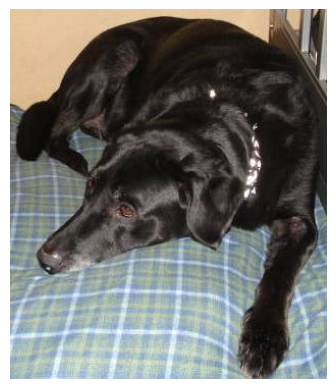

In [42]:
guess_animal('/content/drive/My Drive/Teste/dog.9993.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
dog


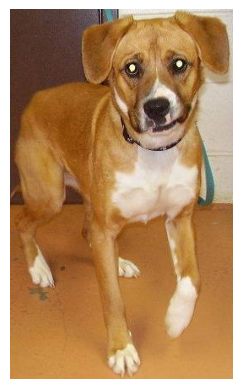

In [43]:
guess_animal('/content/drive/My Drive/Teste/dog.9921.jpg')